# Introduction and Importing Data
Welcome to my code notebook for this project! Here, you'll find my code for the project as well as some documentation for the steps I take. If you haven't already, check my `README.md` for information about my project, my data, and my licensing.   
  
The first step to any data analyzation process is actually finding and importing the data. I'll begin by importing some Python packages and importing a CSV file with all the website from my data in them.

In [1]:
import glob
import nltk
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../fulldata/sites.csv')

In [3]:
data

,filename,websites,titles
0,theatlantic.txt,theatlantic.com,The Atlantic
1,imdb.txt,imdb.com,IMDB
2,nytimes.txt,nytimes.com,The New York Times
3,voxmedia.txt,voxmedia.com,Vox
4,nbcuniversal.txt,nbcuniversal.com,NBC Universal Media
...,...,...,...
108,dailynews.txt,dailynews.com,Los Angeles Daily News
109,lids.txt,lids.com,Lids
110,sports-reference.txt,sports-reference.com,Sports Reference
111,foxsports.txt,foxsports.com,Fox Sports Insider


Our dataframe here is 113 rows x 3 columns, so there are a total of 113 websites in my dataset. These websites include news sites, social media sites, and business sites. 

  
Next, I will import the content of the privacy policies from the text files that I converted to text from HTML. I was going to try to read in the HTML files with a Python package called BeautifulSoup, but it was giving me trouble. I make use of the glob package here to read in each of the contents of the files and match them up to their respective websites. 

In [4]:
filepath = '../fulldata/textpolicies/'
def readtxt(fn):
    f = open(glob.glob(filepath + fn)[0])
    text = f.read()
    f.close()
    return text

data['content'] = data['filename'].apply(readtxt)

data.head()

,filename,websites,titles,content
0,theatlantic.txt,theatlantic.com,The Atlantic,"*Privacy Policy *\n\n*Effective: January 1, 20..."
1,imdb.txt,imdb.com,IMDB,"IMDb Privacy Notice\n\n|||Last Updated, Decemb..."
2,nytimes.txt,nytimes.com,The New York Times,"*Privacy Policy *\n\nLast Updated on June 10, ..."
3,voxmedia.txt,voxmedia.com,Vox,Vox Media Privacy Policy\n\n|||*Updated as of ...
4,nbcuniversal.txt,nbcuniversal.com,NBC Universal Media,Full Privacy Policy\n\nLast updated: 14 Januar...


In [5]:
len(data)

113

# Data Cleaning
As you can see from the dataframe above, there's a lot of non-alphanumeric symbols in the content column. There's asterisks for denoting bold, newline characters, and three vertical bars that denote headings. These aren't relevant to the analysis I'm going to perform, so I am going to drop these characters by splitting the strings by a character into an array of strings, joining them back together, and repeating until the asterisks, newlines, and vertical bars are gone. 

In [6]:
for i in range(len(data)):
    data.content[i] = data.content[i].split('|||')
    tmplist = data.content[i]
    tmpstring = ' '.join(tmplist)
    data.content[i] = tmpstring
    
    data.content[i] = data.content[i].split('*')
    tmplist = data.content[i]
    tmpstring = ' '.join(tmplist)
    data.content[i] = tmpstring
    
    data.content[i] = data.content[i].split('\n')
    tmplist = data.content[i]
    tmpstring = ' '.join(tmplist)
    data.content[i] = tmpstring
    
    data.content[i] = data.content[i].split(':')
    tmplist = data.content[i]
    tmpstring = ' '.join(tmplist)
    data.content[i] = tmpstring
    
    data.content[i] = data.content[i].split(' ')

In [7]:
data

,filename,websites,titles,content
0,theatlantic.txt,theatlantic.com,The Atlantic,"[, Privacy, Policy, , , , , Effective, , Janua..."
1,imdb.txt,imdb.com,IMDB,"[IMDb, Privacy, Notice, , , Last, Updated,, De..."
2,nytimes.txt,nytimes.com,The New York Times,"[, Privacy, Policy, , , , Last, Updated, on, J..."
3,voxmedia.txt,voxmedia.com,Vox,"[Vox, Media, Privacy, Policy, , , , Updated, a..."
4,nbcuniversal.txt,nbcuniversal.com,NBC Universal Media,"[Full, Privacy, Policy, , Last, updated, , 14,..."
...,...,...,...,...
108,dailynews.txt,dailynews.com,Los Angeles Daily News,"[, PRIVACY, POLICY, , , , This, policy, descri..."
109,lids.txt,lids.com,Lids,"[Privacy, Policy, , , Last, updated, , August,..."
110,sports-reference.txt,sports-reference.com,Sports Reference,"[SPORTS, REFERENCE, LLC, -, Privacy, Statement..."
111,foxsports.txt,foxsports.com,Fox Sports Insider,"[Privacy, Policy, Effective, Date, , June, 11,..."


All of those unneeded characters are out of the way, but now there are lots of empty strings/strings that are just spaces in the array of words. I'll drop those. I'm also dropping punctuation after I tokenize the words with NLTK's word_tokenize function. I'm also going to set everything to lowercase so it's easier to look at type-token ratio later on. This way, a capitalized word and a lowercase word won't be counted as two different words. See my comments in the following cells for details on what each portion does. 

In [8]:
for i in range(len(data)): # dropping empty strings
    ct = 0
    while ct < (len(data.content[i])):
        if data.content[i][ct] == '' or data.content[i][ct] == ' ':
            del data.content[i][ct]
        else:
            ct += 1
    tmplist = data.content[i]
    tmpstring = ' '.join(tmplist)
    data.content[i] = tmpstring # joining the array of strings back together into one string

In [9]:
wordtokens = data.content.map(nltk.word_tokenize) # tokenizing the words in each of the entries in content cols

In [10]:
data['tokens'] = wordtokens # creating a new column for the tokenized words

In [11]:
def removepunc(s): # a function for removing commas, periods, etc, as they are unimportant
    words = s
    words = [word.lower() for word in words if word.isalnum()] # making word tokens lowercase too!
    return words

In [12]:
data['tokens'] = data['tokens'].apply(removepunc) # removing punctuation... 

In [13]:
data # done!

,filename,websites,titles,content,tokens
0,theatlantic.txt,theatlantic.com,The Atlantic,"Privacy Policy Effective January 1, 2015 At th...","[privacy, policy, effective, january, 1, 2015,..."
1,imdb.txt,imdb.com,IMDB,"IMDb Privacy Notice Last Updated, December 5, ...","[imdb, privacy, notice, last, updated, decembe..."
2,nytimes.txt,nytimes.com,The New York Times,"Privacy Policy Last Updated on June 10, 2015 T...","[privacy, policy, last, updated, on, june, 10,..."
3,voxmedia.txt,voxmedia.com,Vox,Vox Media Privacy Policy Updated as of May 201...,"[vox, media, privacy, policy, updated, as, of,..."
4,nbcuniversal.txt,nbcuniversal.com,NBC Universal Media,Full Privacy Policy Last updated 14 January 20...,"[full, privacy, policy, last, updated, 14, jan..."
...,...,...,...,...,...
108,dailynews.txt,dailynews.com,Los Angeles Daily News,PRIVACY POLICY This policy describes the priva...,"[privacy, policy, this, policy, describes, the..."
109,lids.txt,lids.com,Lids,"Privacy Policy Last updated August 26, 2014 Ou...","[privacy, policy, last, updated, august, 26, 2..."
110,sports-reference.txt,sports-reference.com,Sports Reference,SPORTS REFERENCE LLC - Privacy Statement A com...,"[sports, reference, llc, privacy, statement, a..."
111,foxsports.txt,foxsports.com,Fox Sports Insider,"Privacy Policy Effective Date June 11, 2015 1....","[privacy, policy, effective, date, june, 11, 2..."


# Analysis
## Length in Words
Our original data is clean, so let's get into some analysis. There are several ways to analyze what privacy policy is a good one. Length in amount of words, average word length, and type-token ratio (word uniqueness) are the three ways of analysis that I'll be looking at. I'll start by just looking at the total length in words. 

In [14]:
data['length'] = None
for i in range(len(data)):
    data['length'][i] = len(data['tokens'][i])

In [15]:
data

,filename,websites,titles,content,tokens,length
0,theatlantic.txt,theatlantic.com,The Atlantic,"Privacy Policy Effective January 1, 2015 At th...","[privacy, policy, effective, january, 1, 2015,...",3296
1,imdb.txt,imdb.com,IMDB,"IMDb Privacy Notice Last Updated, December 5, ...","[imdb, privacy, notice, last, updated, decembe...",1987
2,nytimes.txt,nytimes.com,The New York Times,"Privacy Policy Last Updated on June 10, 2015 T...","[privacy, policy, last, updated, on, june, 10,...",3691
3,voxmedia.txt,voxmedia.com,Vox,Vox Media Privacy Policy Updated as of May 201...,"[vox, media, privacy, policy, updated, as, of,...",2412
4,nbcuniversal.txt,nbcuniversal.com,NBC Universal Media,Full Privacy Policy Last updated 14 January 20...,"[full, privacy, policy, last, updated, 14, jan...",4128
...,...,...,...,...,...,...
108,dailynews.txt,dailynews.com,Los Angeles Daily News,PRIVACY POLICY This policy describes the priva...,"[privacy, policy, this, policy, describes, the...",3306
109,lids.txt,lids.com,Lids,"Privacy Policy Last updated August 26, 2014 Ou...","[privacy, policy, last, updated, august, 26, 2...",2329
110,sports-reference.txt,sports-reference.com,Sports Reference,SPORTS REFERENCE LLC - Privacy Statement A com...,"[sports, reference, llc, privacy, statement, a...",1673
111,foxsports.txt,foxsports.com,Fox Sports Insider,"Privacy Policy Effective Date June 11, 2015 1....","[privacy, policy, effective, date, june, 11, 2...",3063


Now, I'm going to check the shortest and longest policies by word. 

In [16]:
data['length'].max()

7544

In [17]:
data['length'].min()

81

As we can see here, there's a pretty large range as far as amount of words goes. For the sake of visualization, I'm going to make another column that shows the range of words. These ranges will be in 500-word intervals for counts less than 5000, and 1000-word intervals for word counts more than 5000. 

In [18]:
data['lencat'] = None
for i in range(len(data)):
    if len(data['tokens'][i]) < 500:
        data['lencat'][i] = '0-499'
    elif len(data['tokens'][i]) >= 500 and len(data['tokens'][i]) < 1000:
        data['lencat'][i] = '500-999'
    elif len(data['tokens'][i]) >= 1000 and len(data['tokens'][i]) < 1500:
        data['lencat'][i] = '1000-1499'
    elif len(data['tokens'][i]) >= 1500 and len(data['tokens'][i]) < 2000:
        data['lencat'][i] = '1500-1999'
    elif len(data['tokens'][i]) >= 2000 and len(data['tokens'][i]) < 2500:
        data['lencat'][i] = '2000-2499'
    elif len(data['tokens'][i]) >= 2500 and len(data['tokens'][i]) < 3000:
        data['lencat'][i] = '2500-2999'
    elif len(data['tokens'][i]) >= 3000 and len(data['tokens'][i]) < 3500:
        data['lencat'][i] = '3000-3499'
    elif len(data['tokens'][i]) >= 3500 and len(data['tokens'][i]) < 4000:
        data['lencat'][i] = '3500-3999'
    elif len(data['tokens'][i]) >= 4000 and len(data['tokens'][i]) < 4500:
        data['lencat'][i] = '4000-4499'
    elif len(data['tokens'][i]) >= 4500 and len(data['tokens'][i]) < 5000:
        data['lencat'][i] = '4500-4999'
    elif len(data['tokens'][i]) >= 5000 and len(data['tokens'][i]) < 6000:
        data['lencat'][i] = '5000-5999'
    elif len(data['tokens'][i]) >= 6000 and len(data['tokens'][i]) < 7000:
        data['lencat'][i] = '6000-6999'
    elif len(data['tokens'][i]) >= 7000 and len(data['tokens'][i]) < 8000:
        data['lencat'][i] = '7000-7999'

In [19]:
data

,filename,websites,titles,content,tokens,length,lencat
0,theatlantic.txt,theatlantic.com,The Atlantic,"Privacy Policy Effective January 1, 2015 At th...","[privacy, policy, effective, january, 1, 2015,...",3296,3000-3499
1,imdb.txt,imdb.com,IMDB,"IMDb Privacy Notice Last Updated, December 5, ...","[imdb, privacy, notice, last, updated, decembe...",1987,1500-1999
2,nytimes.txt,nytimes.com,The New York Times,"Privacy Policy Last Updated on June 10, 2015 T...","[privacy, policy, last, updated, on, june, 10,...",3691,3500-3999
3,voxmedia.txt,voxmedia.com,Vox,Vox Media Privacy Policy Updated as of May 201...,"[vox, media, privacy, policy, updated, as, of,...",2412,2000-2499
4,nbcuniversal.txt,nbcuniversal.com,NBC Universal Media,Full Privacy Policy Last updated 14 January 20...,"[full, privacy, policy, last, updated, 14, jan...",4128,4000-4499
...,...,...,...,...,...,...,...
108,dailynews.txt,dailynews.com,Los Angeles Daily News,PRIVACY POLICY This policy describes the priva...,"[privacy, policy, this, policy, describes, the...",3306,3000-3499
109,lids.txt,lids.com,Lids,"Privacy Policy Last updated August 26, 2014 Ou...","[privacy, policy, last, updated, august, 26, 2...",2329,2000-2499
110,sports-reference.txt,sports-reference.com,Sports Reference,SPORTS REFERENCE LLC - Privacy Statement A com...,"[sports, reference, llc, privacy, statement, a...",1673,1500-1999
111,foxsports.txt,foxsports.com,Fox Sports Insider,"Privacy Policy Effective Date June 11, 2015 1....","[privacy, policy, effective, date, june, 11, 2...",3063,3000-3499


Let's take a look at these categories to see what ranges are the most common. 

In [20]:
data['lencat'].value_counts()

1000-1499    15
3000-3499    15
0-499        15
2500-2999    14
2000-2499    13
500-999      11
1500-1999    11
3500-3999     6
4000-4499     4
4500-4999     3
5000-5999     3
7000-7999     2
6000-6999     1
Name: lencat, dtype: int64

In [21]:
lencounts = data['lencat'].value_counts()

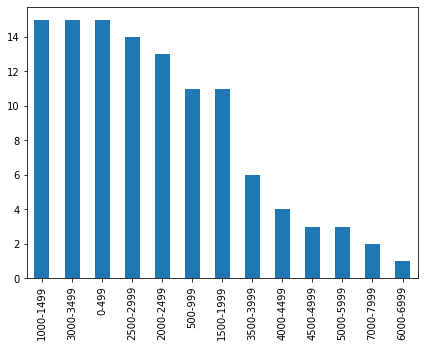

In [22]:
lencounts.plot(kind='bar', figsize=(7,5))

The most common lengths for privacy policies seem to be 3000-3499, 1000-1499, and 0-499 words. According to [wordcounter.io](https://wordcounter.io/faq/how-many-pages-is-1500-words/), 3000-3499 words is like a 12-14 page paper, double spaced. 1000-1499 words is 4-6 pages, double spaced. 500 words is 2 pages, double spaced. It is promising to see quite a few policies below 1000 words. A shorter privacy policy means that people are probably more inclined to read it.  
  
However, there are a couple policies that are worryingly large. There are two policies that are from 7000-7999 words long, which is approximately 30 pages, double spaced. This is ten pages longer than my limit for my research paper during my senior year of high school, and to expect someone to be able to read these policies is ridiculous. Let's check out which policies are over 7000 words.  

In [23]:
data['titles'][pd.Index(data['lencat']).get_loc('7000-7999')]

29     Barnes and Noble
112          Latin Post
Name: titles, dtype: object

This is interesting. Barnes and Noble's policy being long makes a good bit of sense, since there's probably some form of data collection for online orders. I don't know much about Latin Post, though. While it makes sense that B&N's policy is long, that doesn't mean it should be, especially for a website that handles transactions. It can be a complicated process, sure, but it should also be a transparent process that doesn't take half an hour to understand the extent of.  
  
What about the shortest policy with 81 words?

In [24]:
data['titles'][pd.Index(data['length']).get_loc(81)]

'Tanger Outlets'

In [25]:
data['content'][pd.Index(data['length']).get_loc(81)]

'Privacy Policy TangerOutlets is committed to keeping your personal information confidential. Any and all personal identifiable information collected from our customers is used by Tanger Outlets only, and is not sold, shared or distributed to any third party. If at any time you want your email information removed from our database, simply utilize the unsubscribe link provided in your email. Any other data updates or removal requests can be sent to TangerOutlets, Attn Marketing Department, PO Box 10889, Greensboro, NC 27408.'

This is a pretty solid and easy-to-read policy. It gives the reader a way to opt out of email information being collected, and it specifies that the data Tanger Outlets collects from its customers is not sold or redistributed in any way. However, short privacy policies like this one may not be sufficient, as it doesn't describe what is defined as "personal identifiable information" (or PII). Lengthier policies are more likely to describe what constitutes this information. They're also more likely to elaborate on what the website uses this PII for. 
  
  
While I did anticipate that a shorter policy in terms of word count would be easy to read, that doesn't necessarily mean it's a good policy. A human readable policy should be on the lower end of word count, yes, but too short of a word count can mean that important information and definitions regarding PII could potentially be omitted. This has the potential to leave the reader as clueless for a tiny policy as they would be for a huge, novel-length policy. In short, a lower word count tends to be better, but a website must be careful to not make the policy too short. This way, readers won't be overwhelmed by the amount of information, but they'll still be informed. 

## Average Word Length
The next thing we'll work with is the average word length. In general, shorter words tend to be more common and easy to use, while longer words tend to be more difficult to use. This doesn't go for every single word in the English language, so this method of analysis by itself should be taken with a grain of salt. However, when combined with other metrics, it can be telling. Let's get started by creating a function that will get the average word length for each of the policies. 

In [26]:
def wordlen(t): # function to get word lengths; 
    lengths = [len(w) for w in t if w.isalpha()]
    return np.mean(lengths)

data['avg_wlen'] = data['tokens'].apply(wordlen)
data

,filename,websites,titles,content,tokens,length,lencat,avg_wlen
0,theatlantic.txt,theatlantic.com,The Atlantic,"Privacy Policy Effective January 1, 2015 At th...","[privacy, policy, effective, january, 1, 2015,...",3296,3000-3499,5.194639
1,imdb.txt,imdb.com,IMDB,"IMDb Privacy Notice Last Updated, December 5, ...","[imdb, privacy, notice, last, updated, decembe...",1987,1500-1999,5.025265
2,nytimes.txt,nytimes.com,The New York Times,"Privacy Policy Last Updated on June 10, 2015 T...","[privacy, policy, last, updated, on, june, 10,...",3691,3500-3999,4.970267
3,voxmedia.txt,voxmedia.com,Vox,Vox Media Privacy Policy Updated as of May 201...,"[vox, media, privacy, policy, updated, as, of,...",2412,2000-2499,4.962948
4,nbcuniversal.txt,nbcuniversal.com,NBC Universal Media,Full Privacy Policy Last updated 14 January 20...,"[full, privacy, policy, last, updated, 14, jan...",4128,4000-4499,5.190243
...,...,...,...,...,...,...,...,...
108,dailynews.txt,dailynews.com,Los Angeles Daily News,PRIVACY POLICY This policy describes the priva...,"[privacy, policy, this, policy, describes, the...",3306,3000-3499,5.231544
109,lids.txt,lids.com,Lids,"Privacy Policy Last updated August 26, 2014 Ou...","[privacy, policy, last, updated, august, 26, 2...",2329,2000-2499,4.905644
110,sports-reference.txt,sports-reference.com,Sports Reference,SPORTS REFERENCE LLC - Privacy Statement A com...,"[sports, reference, llc, privacy, statement, a...",1673,1500-1999,5.135480
111,foxsports.txt,foxsports.com,Fox Sports Insider,"Privacy Policy Effective Date June 11, 2015 1....","[privacy, policy, effective, date, june, 11, 2...",3063,3000-3499,5.114754


Alright, just from what we see here, the average of the average word lengths is around five characters, no matter the length. Let's double check that, though. 

In [27]:
data['avg_wlen'].max()

5.699754901960785

In [28]:
data['avg_wlen'].min()

4.66852886405959

Okay, so there is a difference between the largest average word length and the smallest average word length, even if it is just by a character. Let's look at where these policies are from and check out their word counts. 

In [29]:
data['titles'][pd.Index(data['avg_wlen']).get_loc(data['avg_wlen'].max())]

'Dallas County Community College District'

In [30]:
data['length'][pd.Index(data['avg_wlen']).get_loc(data['avg_wlen'].max())]

820

This is a short policy... let's read it:

In [31]:
data['content'][pd.Index(data['avg_wlen']).get_loc(data['avg_wlen'].max())]

'Privacy and Security Commitment Our Promise to You Dallas County Community College District\'s (DCCCD) Privacy Commitment is based on two principles. We promise to Comply with all the applicable local, state and federal laws and regulations; and Protect your privacy while still offering relevant, personalized service. DCCCD is a public higher education institution and therefore bound by the Texas Public Information Act and the Family Education Rights and Privacy Act (FERPA). Continue reading for more detailed information about DCCCD\'s Privacy and Security Commitment. Texas Public Information Act The Texas Public Information Act requires disclosure of information by a public body -- unless the law specifically protects the information. Most information kept by a public body is public under the Act. The State Attorney General enforces this Act. Family Education Rights and Privacy Act of 1974 (FERPA) FERPA protects educational records of a student from public disclosure without written 

This is a pretty spot-on privacy policy. There's little legalese and while it is daunting to look at in one big blob of text like this, it's very probable that with appropriate headings and spaces, it's easy to read. It's under 1000 words, it reports on what services it uses with PII (Google Analytics, etc.), it references specific laws, and is very clear under what circumstances PII is released. This goes to show that average word length isn't really that good of a metric to measure whether a privacy policy is readable or not. However, as I mentioned before, it can be combined with other metrics to make a more informed argument.  
  
I'm still curious as to what the minimum average word length's policy looks like. 

In [32]:
data['titles'][pd.Index(data['avg_wlen']).get_loc(data['avg_wlen'].min())]

'Sci News'

In [33]:
data['length'][pd.Index(data['avg_wlen']).get_loc(data['avg_wlen'].min())]

539

Another, even shorter one! Since it's short (less than 1000 words), we can look at it like we did with the Dallas County Community College District privacy policy above. 

In [34]:
data['content'][pd.Index(data['avg_wlen']).get_loc(data['avg_wlen'].min())]

'Privacy Policy Sci-News.com is committed to protecting and respecting your privacy. To better inform you of our policy concerning user privacy, we have adopted the following terms. Please note that these terms are subject to change, and any such changes will be included on this page. Information that Sci-News.com May Collect Online Sci-News.com may collect and process the following data about you - information that you provide by filling in forms on our site, including names, e-mail and website addresses; we may also ask you for information for other purposes, for example when you report a problem with our site; - if you contact us, we may keep a record of that correspondence; - details of your visits to our site including, but not limited to, traffic data, location data, weblogs and other communication data. Sci-News.com does not knowingly collect or solicit personal information from anyone under the age of 13. We assume that minors 13 years of age or older have received permission f

This is another great policy. It clearly states what it defines as PII, and even defines a cookie to those who might not be as Internet-literate. This definition and explanation of cookies is especially important to ensure that people know what they're signing up for. It even specifies that PII will be removed upon request if a user wishes to do so and instructs readers on how to do it.
  
  
While DCCCD's policy is a bit longer, there is more PII that a community college may collect on its students. School websites have the justification to do this, so it makes sense that more regulations are outlined in DCCCD. Both privacy policies that I've looked at do all of the things a privacy policy should: keep it short and human-readable, but still outline the policy in a thorough way so users won't be left guessing over how much of their information is collected by the website. This thoroughness is what the Tanger Outlets policy lacks. It tells us about how PII is not shared with third parties, but does not specify anything about what PII exactly it collects. 
  
  
To conclude this section, though: average word length should *not* be the only metric used in determining whether a privacy policy is readable to the average Internet user. Both the policies with the longest and shortest average word length were perfectly readable and accomplished everything a privacy policy should. This doesn't mean this section was completely useless, however. As I've mentioned before, this metric can be a supplement for other metrics. That said, let's move on. 

## Type-Token Ratio
The final metric that I'll be looking at is type-token ratio (TTR). TTR is a measure of lexical density, or word uniqueness. It takes the number of unique words and divides that number by the number of total words in a given string. A high TTR in this case could be an indication of lots of legalese being used. I will begin here by defining a function, much like the functions I've defined above, that gets the TTR for all of these policies. 

In [35]:
def get_ttr(tokens):
    lower = [w.lower() for w in tokens]
    return len(set(lower))/len(lower)

In [36]:
data['TTR'] = data.tokens.map(get_ttr)
data

,filename,websites,titles,content,tokens,length,lencat,avg_wlen,TTR
0,theatlantic.txt,theatlantic.com,The Atlantic,"Privacy Policy Effective January 1, 2015 At th...","[privacy, policy, effective, january, 1, 2015,...",3296,3000-3499,5.194639,0.216019
1,imdb.txt,imdb.com,IMDB,"IMDb Privacy Notice Last Updated, December 5, ...","[imdb, privacy, notice, last, updated, decembe...",1987,1500-1999,5.025265,0.262708
2,nytimes.txt,nytimes.com,The New York Times,"Privacy Policy Last Updated on June 10, 2015 T...","[privacy, policy, last, updated, on, june, 10,...",3691,3500-3999,4.970267,0.209428
3,voxmedia.txt,voxmedia.com,Vox,Vox Media Privacy Policy Updated as of May 201...,"[vox, media, privacy, policy, updated, as, of,...",2412,2000-2499,4.962948,0.245854
4,nbcuniversal.txt,nbcuniversal.com,NBC Universal Media,Full Privacy Policy Last updated 14 January 20...,"[full, privacy, policy, last, updated, 14, jan...",4128,4000-4499,5.190243,0.187016
...,...,...,...,...,...,...,...,...,...
108,dailynews.txt,dailynews.com,Los Angeles Daily News,PRIVACY POLICY This policy describes the priva...,"[privacy, policy, this, policy, describes, the...",3306,3000-3499,5.231544,0.201149
109,lids.txt,lids.com,Lids,"Privacy Policy Last updated August 26, 2014 Ou...","[privacy, policy, last, updated, august, 26, 2...",2329,2000-2499,4.905644,0.259768
110,sports-reference.txt,sports-reference.com,Sports Reference,SPORTS REFERENCE LLC - Privacy Statement A com...,"[sports, reference, llc, privacy, statement, a...",1673,1500-1999,5.135480,0.300060
111,foxsports.txt,foxsports.com,Fox Sports Insider,"Privacy Policy Effective Date June 11, 2015 1....","[privacy, policy, effective, date, june, 11, 2...",3063,3000-3499,5.114754,0.214822


We're already seeing some interesting things here. Despite Latin Post having an incredibly long word count, it has an incredibly low TTR. We'll just repeat the procedure we did with the other two metrics:

In [37]:
data['TTR'].max()

0.7777777777777778

In [38]:
data['titles'][pd.Index(data['TTR']).get_loc(data['TTR'].max())]

'Tanger Outlets'

We already looked at Tanger Outlets and their privacy policy was very short. Sometimes, shorter privacy policies tend to have a higher TTR just because they're short. We should probably check out some other higher TTR ratios for policies that are longer. Let's do that next by looking at TTRs above 0.5.

In [39]:
for i in range(len(data)):
    if data['length'][i] >= 100 and data['TTR'][i] >= 0.5:
        print(data['titles'][i], "- length:", data['length'][i])

Community Coffee - length: 195
Dog Breed Info Center - length: 210
Chicken Roost - length: 178
University of Houston - length: 304
OpenSecrets - length: 344


All of these policies have greater than 100 words in them, but they also have less than 500 words in them. Again, shorter policies usually have higher TTRs not because of lexical diversity, but because there's less of a lexicon being used in the first place. This doesn't mean these are good or bad policies; it really depends on the content. Let's take a peek at one of them:

In [40]:
data['content'][pd.Index(data['length']).get_loc(195)] # community coffee privacy policy

'PRIVACY STATEMENT OUR COMMITMENT TO PROTECTING YOUR PRIVACY Community Coffee Company respects your right to privacy and is committed to protecting it. In our site, we give you opportunities to provide your name, address, email and other relevant information that we use to give you a more personalized shopping experience and to make ordering and reordering easier for you. We do not sell or trade customer information with others for use on their mailing lists. THE PROTECTION OF YOUR PERSONAL ACCOUNT INFORMATION When you place an order on our site, it is placed through a secure server. This server encrypts all information you input before it is sent. Once your personal information is received, we protect it against unauthorized use. THE USE OF COOKIES Cookies are alphanumeric identifiers which collect anonymous browsing data that enables us to recognize your browser and provide convenience features such as the storing of items in your Shopping Cart and the personalization of content base

This policy does the job. It isn't perfect, but it explains things like cookies and tells the reader some of what they consider PII. It explains what this PII is used for (creating a "more personalized shopping experience") and  ensures encryption of the PII it collects. Let's look at one more policy just to be sure. 

In [41]:
data['content'][pd.Index(data['length']).get_loc(210)] # dog breed info center

'Privacy Policy Dog Breed Info Center does not collect or use your personal information, except in limited circumstances. When submitting photos, listing in our classifieds, or taking our survey, Dog Breed Info Center may collect your name, email address, home address and/or phone number. However, Dog Breed Info Center will not sell this information or your photos to a third party or place you on a mailing list without your express permission. Dog Breed Info Center does not collect cookies from its users. This is strictly an information site used for research and your enjoyment. Dog Breed Info Center uses Google AdSense, which allows third-party vendors to serve ads on our website. You can find a list of allowed third-party ads by going to https //www.google.com/adsense/support/bin/answer.py?answer=94149topic=14535. The third-party advertising companies that Google uses to serve ads when you visit our website may use information that will help them serve ads that will interest you. How

Another decent policy. It outlines what PII is used for (submitting photos/classifieds/surveys) and says that it doesn't use cookies. It also notifies the user of Google Adsense being used, which is essentially a third party. It redirects the user to Google Adsense sites and explains Google Adsense on a surface level in order to answer any questions a reader might have. Now, we should maybe take a peek at longer policies that don't necessarily have a higher TTR than these shorter ones, but a higher TTR nonetheless. 

In [42]:
for i in range(len(data)):
    if data['length'][i] >= 2000 and data['TTR'][i] >= 0.25: # 8 page paper double spaced, TTR 25% uniqueness
        print(data['titles'][i], "- length:", data['length'][i], "- TTR:", data['TTR'][i])

PBS - length: 2237 - TTR: 0.2610639248994189
Visit New Orleans - length: 2227 - TTR: 0.26807364167040865
Gawker - length: 2006 - TTR: 0.2831505483549352
Sciencemag - length: 2750 - TTR: 0.2549090909090909
Internet Brands Automotive Group - length: 2208 - TTR: 0.25271739130434784
Miami New Times - length: 2011 - TTR: 0.26305320735952264
Geocaching - length: 2297 - TTR: 0.25729212015672615
WSMV News - length: 2252 - TTR: 0.25932504440497334
Lids - length: 2329 - TTR: 0.2597681408329755


I'm going to come back to these later... let's check out the smallest TTR. 

In [43]:
data['TTR'].min()

0.13779397151374628

In [44]:
data['titles'][pd.Index(data['TTR']).get_loc(data['TTR'].min())]

'Honda'

In [45]:
data['length'][pd.Index(data['TTR']).get_loc(data['TTR'].min())]

6038

This also makes a bit of sense. TTR has a lot to do with text length here. This is why we need to combine it with different metrics and only look at texts of a certain length, which is what I'll be doing next. 

## Moving On and Combining Metrics
TTR tends to be tricky to work with because of its dependency on length. Because of this, I'm going to have to take some alternative approaches to looking at some of these TTR numbers. What I'm going to do next is look at all of the longer unique words in a couple of these policies. 

In [46]:
def unique(ls): 
    unq = [] 
    for x in ls: 
        # check if exists in unique_list or not 
        if x not in unq: 
            unq.append(x) 
    return unq

In [47]:
unq_pbs = unique(data['tokens'][pd.Index(data['length']).get_loc(2237)]) # looking at pbs's website!

In [48]:
for x in unq_pbs:
    if len(x) > 8: # longer words are generally more complicated
        print(x, end=' ')

committed protecting information affiliates personally identifiable preserving integrity collected protected organizations responsible practices encourage organization submitting addresses discussed voluntary telephone registration resources broadcasting opportunity subscriptions submissions published community suggestions connection activities submission additionally sweepstakes participate indicated collection listservs newsletters subscribe automatically experience reference aggregate technologies preferences generally expressly willfully receiving permission described marketing promotional fundraising typically circumstances participation companies providers databases including listeners registering newsletter questions membership contributions inquiries distribution processing promotions management correspond fulfillment necessary possession contracted authorized similarly applicable transmitting available carefully individuals identification administrative enforcement confirmatio

Quite a few big words being used here - 129, to be exact. It's hard to say whether they can be considered *too* complicated because we can't see the context in which they're being used, but you have to wonder whether these words, like "aggregate" and "affiliates" can be properly understood at an eighth grade level. 
  
There is another policy in here with a higher TTR than PBS by a notable amount; it might look like only a 2% increase but depending on what words we find here, this policy could be worse. Or, it could be better, and the increase is just because there's less words in this policy -- the Gawker policy. We'll simply repeat the process we did above with the PBS policy. 

In [50]:
unq_gawker = unique(data['tokens'][pd.Index(data['titles']).get_loc('Gawker')])

In [51]:
for x in unq_gawker:
    if len(x) > 8: # longer words are generally more complicated
        print(x, end=' ')

applications statement carefully proceeding indicates understood agreement information collection different subscribers including demographic interests aggregate organization continued communications occasionally editorial independence sponsored advertisers experience contribute anonymous prohibited notifications necessary commenters circumstances contributions collected identifying passwords technologies understand advertising persistent terminates following directions configure advantage offerings affiliate marketing personally identifiable referenced responsible practices encourage statements delivered originates providers otherwise originators addresses discretion generally telephone opportunity occupation mechanisms appearing doubleclick proprietary specifically reporting contextual confidentiality requirements distribute advertisements behavioral participate commission purchases companies advertiser advertisement characteristics categories commitment transparency transitions tran

There's 134 bigger words here, and this doesn't seem to be any better than PBS's policy as far as words that a middle schooler would be able to understand. We see "aggregate" and "affiliate" again, which are words that I admittedly had to look up the definitions for. 